In [18]:
from ipywidgets import interact
import bqplot.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [16]:
# define global parameters (change N if necessary)
N = 1000
t = np.linspace(0,70,70)

## Fancy Way

In [3]:
def calc(b,g, N):
    """
    solve ODE
    
    Parameters
    ------------------------------------------------
    b: infection rate 
    g: recovery rate
    """
    
    I0, R0 = 1, 0 # set initial condition
    S0 = N - I0 - R0 # set initial condition
    beta, gamma = b, g # define parameter

    def deriv(y, t, N, beta, gamma):
        """
        define ODE
    
        Parameters
        ------------------------------------------------
        y: variable
        t: range of time
        N: total population
        beta: transmission rate 
        gamma: recovery rate
        """
        
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    y0 = S0, I0, R0 # combine initial condition
    ret = odeint(deriv, y0, t, args=(N, beta, gamma)) # solve ODE
    return ret.T

In [11]:
def graph_S(infection,recovery):
    """
    Function to plot the SIR model
    
    Parameters
    ------------------------------------------------
    b: infection rate 
    g: recovery rate
    """
    
    S,I,R= calc(infection, recovery, N)
    fig.marks[0].y = S/N
    fig.marks[0].y = I/N
    fig.marks[0].y = R/N

# def graph_I(infection_I,recovery_I):
#     """
#     Same as above
#     """
    
#     S,I,R= calc(infection_I, recovery_I, N)
#     fig.marks[0].y = I/N

# def graph_R(infection_R,recovery_R):
#     """
#     Same as above
#     """
    
#     S,I,R= calc(infection_R, recovery_R, N)
#     fig.marks[0].y = R/N

In [12]:
# solve ODE
S, I, R = calc(0.90, 0.80, N)

# plot the ODE  
fig = plt.figure(title='SIR Model', animation_speed=1000)
plt.plot(t, I/N, 'r-', alpha=0.5, lw=2, labels=['Infected'])
plt.plot(t, S/N, 'b-', alpha=0.5, lw=2, labels=['Susceptible'])
plt.plot(t, R/N, 'g-', alpha=0.5, lw=2, labels=['Recovered'])
plt.legend()
plt.show()

# add interactive method to modify beta and gamma
interact(graph_S, infection=(0.1,1.0,0.01), recovery=(0.1,1.0,0.01))
# interact(graph_I, infection_I=(0.1,1.0,0.01), recovery_I=(0.1,1.0,0.01))
# interact(graph_R, infection_R=(0.1,1.0,0.01), recovery_R=(0.1,1.0,0.01))

interactive(children=(FloatSlider(value=0.55, description='infection', max=1.0, min=0.1, step=0.01), FloatSlid…

<function __main__.graph_S(infection, recovery)>

## Regular

In [19]:
import matplotlib.pyplot as plt

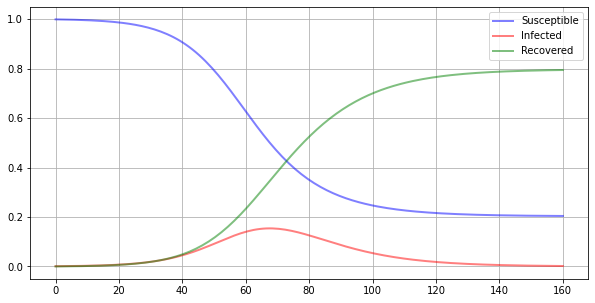

In [32]:
# set initial condition
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.2, 1./10 
t = np.linspace(0, 160, 160)

# define ODE system
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# combine initial condition
y0 = S0, I0, R0

# solve ODE
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# plot ODE
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.legend()
ax.grid()
plt.show()